<a href="https://colab.research.google.com/github/Piyush-Jangid/Time-Series-Forecating-/blob/main/Time_Series_Forecasting_ARMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PIYUSH JANGID (20CE10043) 

In [ ]:
#Importing the liberaries

import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt  #for ploting the figures
from pandas.plotting import register_matplotlib_converters 
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf #For ploting ACF and PACF 
from statsmodels.tsa.arima_model import ARMA # For running ARMA model
register_matplotlib_converters()
from time import time

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Catfish Sales Data

In [ ]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')  #Year - month -date

now we will use CSV file to retrive data from there 

In [ ]:
#read data
fish_sales = pd.read_csv('https://raw.githubusercontent.com/nihalk17/Public_One/main/catfish4.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [ ]:
fish_sales.head() #For look at Starting datas

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
Name: Total, dtype: int64

In [ ]:
num_lags = 30

In [ ]:
#infer the frequency of the data
fish_sales = fish_sales.asfreq(pd.infer_freq(fish_sales.index))

In [ ]:
start = datetime(2000,1,1)
end= datetime(2004,1,1)
set_fish_sales = fish_sales[start:end]

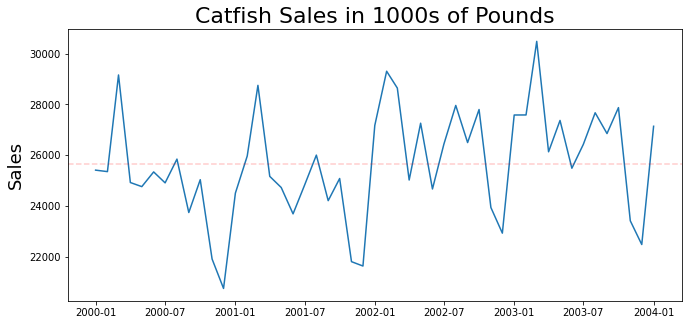

In [ ]:
plt.figure(figsize=(11,5))
plt.title('Catfish Sales in 1000s of Pounds', fontsize=22)
plt.ylabel('Sales', fontsize=18)
plt.plot(set_fish_sales)
plt.axhline(set_fish_sales.mean(), color='r', alpha=0.2, linestyle='--')  

Here we can see data is not staionary hence we will take first difference and make it stationary

In [ ]:
first_diff = set_fish_sales.diff()[1:]

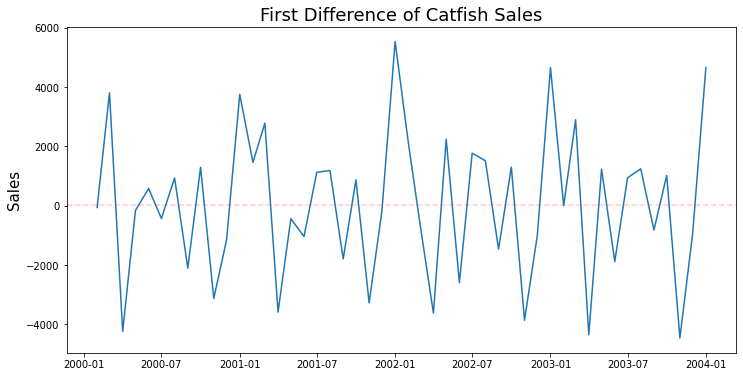

In [ ]:
plt.figure(figsize=(12,6))
plt.title('First Difference of Catfish Sales', fontsize=18)
plt.ylabel('Sales', fontsize=15)
plt.plot(first_diff)
plt.axhline(first_diff.mean(), color='r', alpha=0.2, linestyle='--')#For ploting horizontalat 0 sales 

Now data become stationary 

ACF

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


<BarContainer object of 30 artists>

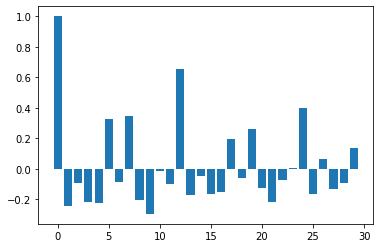

In [ ]:
ACF = acf(first_diff)
plt.bar(range(num_lags), ACF[:num_lags]) #It plots Auto correlation finction with specified lags 

Here we can see first lag error terms is significant Based on ACF, we should start with a MA(1) process

PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<BarContainer object of 30 artists>

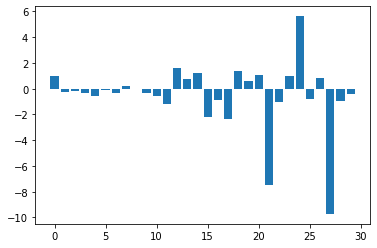

In [ ]:
PACF = pacf(first_diff)
plt.bar(range(num_lags), PACF[:num_lags])

Here if we look at some starting lags , lag 4 is significant,Based on PACF, we should start with a AR(4) process

Get training and testing sets

In [ ]:
train_end = datetime(2003,7,1)
test_end = datetime(2004,1,1)

trained_data = first_diff[:train_end] 
test_data = first_diff[train_end + timedelta(days=1):test_end] 

Fit the ARMA Model

In [ ]:
# define model
fish_model = ARMA(trained_data, order=(4,1))

In [ ]:
#fit the model
start = time()
model_fit = fish_model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.34224700927734375


It is small when we take starting initial lag term in pacf but it will be much heigher when we take higher lag error term there model does not work goof hence then we use other models

In [ ]:
#summary of the model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Total   No. Observations:                   42
Model:                     ARMA(4, 1)   Log Likelihood                -376.584
Method:                       css-mle   S.D. of innovations           1850.781
Date:                Thu, 07 Apr 2022   AIC                            767.167
Time:                        07:55:28   BIC                            779.331
Sample:                    02-01-2000   HQIC                           771.626
                         - 07-01-2003                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.2955    129.751      0.287      0.775    -217.012     291.603
ar.L1.Total    -0.8666      0.185     -4.692      0.000      -1.229      -0.505
ar.L2.Total    -0.4236      0.166     -2.547    

In [ ]:
#get prediction start and end dates
predicted_startdate = test_data.index[0]
predicted_enddate = test_data.index[-1]

In [ ]:
#get the predictions and residuals
predictions = model_fit.predict(start=predicted_startdate, end=predicted_enddate)
residuals = test_data - predictions

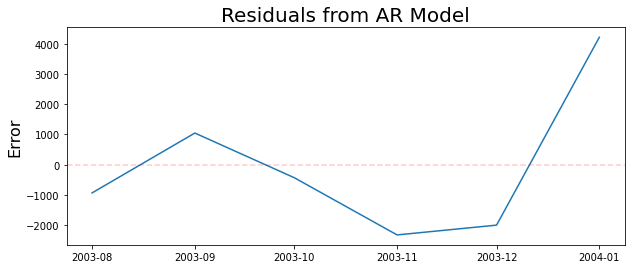

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(residuals) #ploting residuals
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

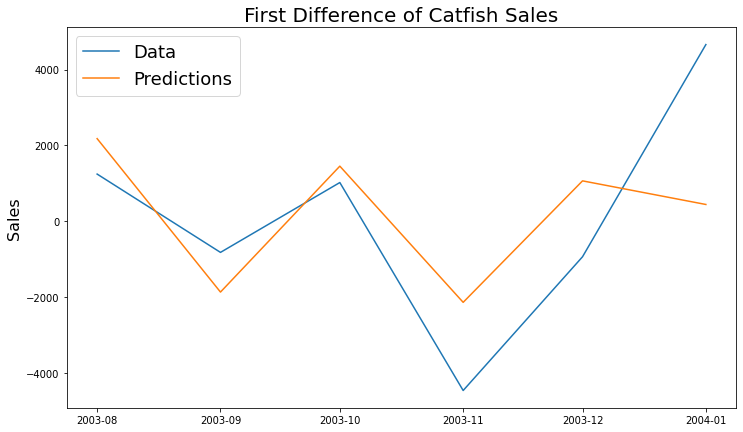

In [ ]:
plt.figure(figsize=(12,7))

plt.plot(test_data) 
plt.plot(predictions)#This plots predicted data of sales of fish

plt.legend(('Data', 'Predictions'), fontsize=18)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)